# Training models - Linear Regression

## Normal equation

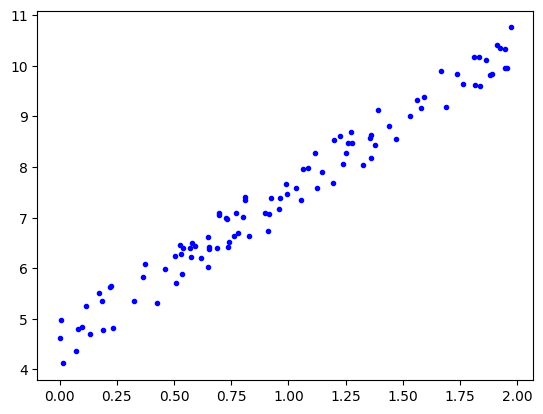

In [31]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100,1)

plt.plot(X, y, "b.")

In [32]:
X_b = np.c_[np.ones((100, 1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).T.dot(X_b.T).dot(y)
theta_best

array([[4.60397299],
       [2.91358522]])

In [33]:
X_new = np.array([[0], [2]])
print(X_new)
X_new_b = np.c_[np.ones((2,1)), X_new]
print(X_new_b)

y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[0]
 [2]]
[[1. 0.]
 [1. 2.]]
[[ 4.60397299]
 [10.43114343]]


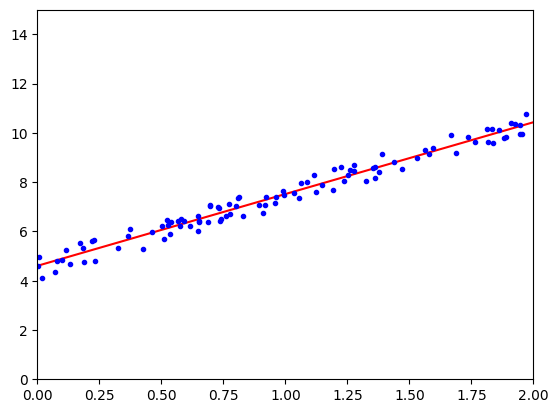

In [34]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0., 2., 0., 15.])
plt.show()

In [37]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.60397299]), array([[2.91358522]]))

In [38]:
lin_reg.predict(X_new)

array([[ 4.60397299],
       [10.43114343]])

## Batch gradient descent

In [39]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.rand(2,1)

for it in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.60397299],
       [2.91358522]])

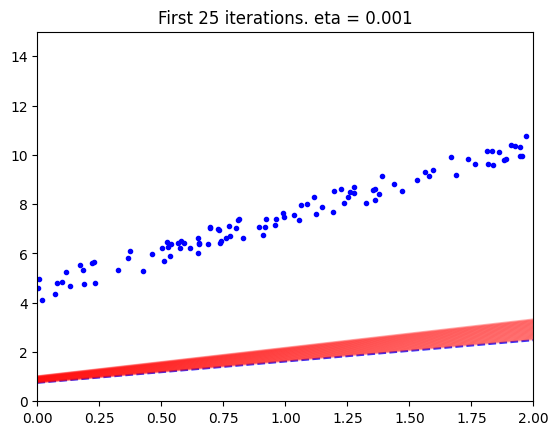

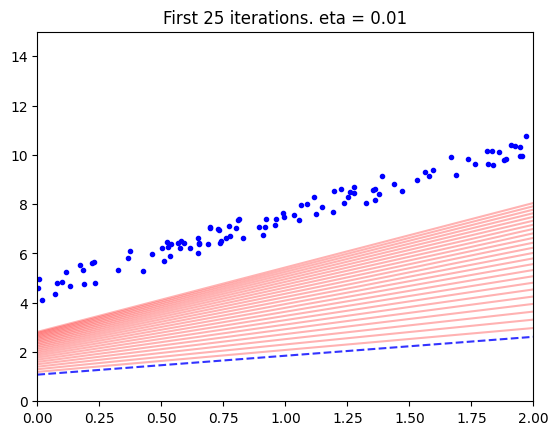

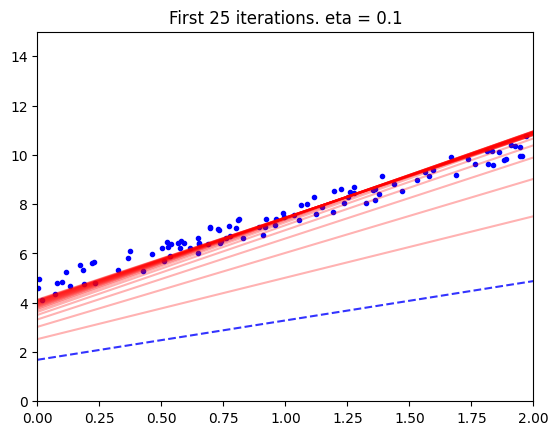

In [50]:
# Plot the resulting line with different learning rates. Starting line is red dashed. Try with 1e-2, 1e-1, 0.5, 1.0. One plot per learning rate. Plot only 10 first iterations.
from matplotlib import pyplot as plt

etas = [1e-3, 1e-2, 1e-1]
for eta in etas:
    theta = np.random.rand(2,1)
    plt.plot(X, y, "b.")
    for it in range(25):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        y_predict = X_new_b.dot(theta)
        if it == 0:
            plt.plot(X_new, y_predict, "b--", alpha=.8)
        else:
            plt.plot(X_new, y_predict, "r-", alpha=.3)
        plt.title("First 25 iterations. eta = " + str(eta))
    plt.axis([0., 2., 0., 15.])
    plt.show()

## Stochastic gradient descent

In [ ]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random